In [1]:
# prog math 127 MCMC 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
rng = default_rng(12345)

In [3]:
def underlying(x,params):
    return params[0] *x ** 2 +params[1]*x + params[2]


In [14]:
size = 100
true_params = [2, -7, 5]

In [15]:
# generate the sample by the underlying func

x_vals = np.linspace(-5, 5, size)
raw_model = underlying(x_vals,true_params)
noise = rng.normal(loc=0,scale=10,size=size)
sample = raw_model + noise

Text(0, 0.5, 'y')

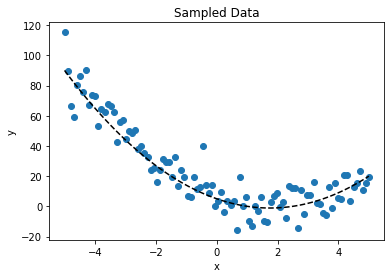

In [16]:
fig1, ax1 = plt.subplots()
ax1.scatter(x_vals,sample,label="Sampled data")
ax1.plot(x_vals,raw_model,"k--",label="Underlying model")
ax1.set_title("Sampled Data")
ax1.set_xlabel("x")
ax1.set_ylabel("y")


In [40]:
# 100 samples are sufficient to plot
import pymc3 as pm
import pymc3.model as model

In [42]:
params = pm.Normal("params", mu=1, sigma=1, shape=3)

TypeError: No model on context stack, which is needed to instantiate distributions. Add variable inside a 'with model:' block, or use the '.dist' syntax for a standalone distribution.

In [34]:
y = underlying(x_vals,params)
y_obs = pm.Normal("y_obs", mu = y, sigma=2,observed = sample)

NameError: name 'params' is not defined